## 4. Solve the Laplace Equation

$$
\frac{\partial^2 \phi}{\partial x^2}+\frac{\partial^2 \phi}{\partial y^2}=0
$$

in $0 \leq x \leq 1, 0 \leq y \leq 2$ by spectral method with $\Delta \leq 0.01$.

The boundary condition is

$$
\begin{cases}
\phi(x=0,0<y<2)=0\\
\phi(x=1,0<y<2)=0\\
\phi(0\leq x\leq1,y=0)=0\\
\phi(0\leq x\leq1,y=2)=\sqrt{1-x^2}
\end{cases}
$$

Show your answer by plotting $\phi(x,y)$.

### Analysis:

Using finite differencing method:

Model PDE:

$$
\frac{\partial^2 \phi}{\partial x^2}+\frac{\partial^2 \phi}{\partial y^2}=0
$$

by

* $x_j = x_0 + j\Delta, j=0,1,\cdots,J$
* $y_l = y_0 + l\Delta, l=0,1,\cdots,L$
* $\rho_{jl}=\rho(x_j,y_l)=0$
* $\phi_{jl}=\phi(x_i,y_l)$

This is a laplace equation with inhomogeneous Dirichlet boundary condition:

$\phi=0$ on all boundaries except for $\phi=f(x)=\sqrt{1-x^2},(f_j=f(x_j))$ on $y=2,(l=L)$.

Decompose the $\phi=\phi^{I}+\phi^{B}$

where $\phi^{I}=0$ on all boudaries and

$$
\phi_{jl}^{B}=
\begin{cases}
f_j,&l=L,\\
0,&0\leq l<L.
\end{cases}
$$

Then 

$$
\begin{aligned}
\nabla^2\phi^{I}&=\rho-\nabla^2\phi^{B}\\
&=\Delta^2\rho^{'}_{jl}
\end{aligned}
$$

where 

$$
\rho^{'}_{jl}=\begin{cases}
-\frac{f_j}{\Delta^2},&l = L-1\\
0,& else
\end{cases}
$$

Spectral method's procedure:

1. Compute DFT of $\rho^{'}$
$$
\begin{aligned}
\tilde{\rho}_{mn}&=\sum_{j=1}^{J-1}\sum_{l=1}^{L-1}\rho^{'}_{jl}\sin{\frac{\pi j m}J}\sin{\frac{\pi l n}L}\\
&=\sum_{j=1}^{J-1}\rho^{'}_{j,L-1}\sin{\frac{\pi j m}J}\sin{\frac{\pi (L-1) n}L}\\
&=-\frac1{\Delta^2}\sin{\frac{\pi (L-1) n}L}\sum_{j=1}^{J-1}f_j\sin{\frac{\pi j m}J}
\end{aligned}
$$
2. Compute $\tilde{\phi}$ from $\tilde{\rho}$ for $(m,n)\neq(0,0)$
    $$
    \tilde{\phi}_{mn}=\frac{\Delta^2}2\frac{\tilde{\rho}_{mn}}{\cos{\frac{\pi m}J}+\cos{\frac{\pi n}L}-2}
    $$
    
3. Compute $\phi^{I}_{jl}$ using inverse DFT

$$
\phi^{I}_{jl}=\frac2J\frac2L\sum_{m=1}^{J-1}\sum_{n=1}^{L-1}\tilde{\phi}_{mn}\sin{\frac{\pi j m}J}\sin{\frac{\pi l n}L}
$$

4. Compute $\phi_{jl}=\phi^{I}_{jl}+\phi^{B}_{jl}$.

    When $j=1,\cdots,J-1$ and $l=1,\cdots,L-1$,$\phi_{jl}=\phi^{I}_{jl}$.

In [45]:
Δ = 0.01
x₀,xᴶ = 0,1
y₀,yᴸ = 0,2
J = Int((xᴶ-x₀)/Δ)
L = Int((yᴸ-y₀)/Δ)
js = Vector(1:(J-1))
ms = js
ls = Vector(1:(L-1))
ns = ls
x = @. x₀ + js * Δ
y = @. y₀ + ls * Δ
f = @. sqrt(1 - x ^ 2);

In [67]:
ρ̃ = -1/Δ^2 .* sin.(π*(L-1)/L .* ns') .* sum(@.(f'*sin(π/J*js'*ms));dims=2)

99×199 Matrix{Float64}:
 -8243.77     16485.5      -24723.2      …  16485.5      -8243.77
 -1619.91      3239.42      -4858.14         3239.42     -1619.91
 -2184.34      4368.14      -6550.86         4368.14     -2184.34
  -934.125     1868.02      -2801.45         1868.02      -934.125
 -1230.85      2461.41      -3691.35         2461.41     -1230.85
  -659.73      1319.3       -1978.54     …   1319.3       -659.73
  -850.034     1699.86      -2549.26         1699.86      -850.034
  -510.659     1021.19      -1531.47         1021.19      -510.659
  -646.188     1292.22      -1937.93         1292.22      -646.188
  -416.538      832.972     -1249.2           832.972     -416.538
  -519.45      1038.77      -1557.84     …   1038.77      -519.45
  -351.469      702.851     -1054.06          702.851     -351.469
  -433.064      866.022     -1298.77          866.022     -433.064
     ⋮                                   ⋱               
   -13.9669      27.9303      -41.8868         27.930

In [69]:
ϕ̃ = @. Δ^2/2 * ρ̃/(cos(π*ms/J)+cos(π*ns'/L)-2)

99×199 Matrix{Float64}:
 668.262        -835.235        770.882        …  -0.412138     0.206056
  38.6312        -65.6628        78.779           -0.0809257    0.0404604
  23.9437        -44.2883        59.0363          -0.108988     0.0544909
   5.83196       -11.1474        15.5715          -0.0465285    0.0232628
   4.94914        -9.61103       13.7513          -0.0611736    0.030585
   1.84942        -3.62321        5.25567      …  -0.0327009    0.0163495
   1.75579        -3.45827        5.05939         -0.042001     0.0209993
   0.809537       -1.6001         2.35416         -0.0251411    0.0125698
   0.81119        -1.60725        2.37395         -0.0316842    0.0158412
   0.424459       -0.84246        1.24786         -0.0203318    0.0101653
   0.438409       -0.871268       1.29325      …  -0.0252297    0.0126142
   0.249811       -0.496947       0.738824        -0.0169793    0.00848918
   0.262881       -0.523347       0.779052        -0.0208003    0.0103996
   ⋮           

In [100]:
ϕf(j,l) = 4/J/L * sum(@.(ϕ̃ * (sin(π*j/J*ms) * sin(π*l/L*ns'))))

ϕf (generic function with 1 method)

In [102]:
ϕ = ϕf.(js,ls')

99×199 Matrix{Float64}:
 3.87672e-6  7.75728e-6  1.16455e-5   …  0.208511   0.301708   0.49963
 7.74959e-6  1.55069e-5  2.32795e-5      0.374936   0.498691   0.696863
 1.16148e-5  2.32411e-5  3.48904e-5      0.497285   0.621258   0.789332
 1.54685e-5  3.09523e-5  4.64667e-5      0.58562    0.699723   0.839657
 1.93068e-5  3.86327e-5  5.7997e-5       0.650006   0.752357   0.870372
 2.3126e-5   4.62749e-5  6.94698e-5   …  0.697886   0.789325   0.890727
 2.69223e-5  5.38713e-5  8.08737e-5      0.734296   0.816331   0.905011
 3.06919e-5  6.14142e-5  9.21974e-5      0.762575   0.836694   0.915439
 3.44311e-5  6.88963e-5  0.00010343      0.784949   0.85243    0.923256
 3.81361e-5  7.63101e-5  0.00011456      0.802926   0.864821   0.929214
 4.18034e-5  8.36482e-5  0.000125576  …  0.817553   0.874712   0.933792
 4.54292e-5  9.09034e-5  0.000136468     0.82957    0.882683   0.937309
 4.901e-5    9.80686e-5  0.000147224     0.839514   0.889142   0.939987
 ⋮                                    ⋱  

In [104]:
using Plots
plotly();

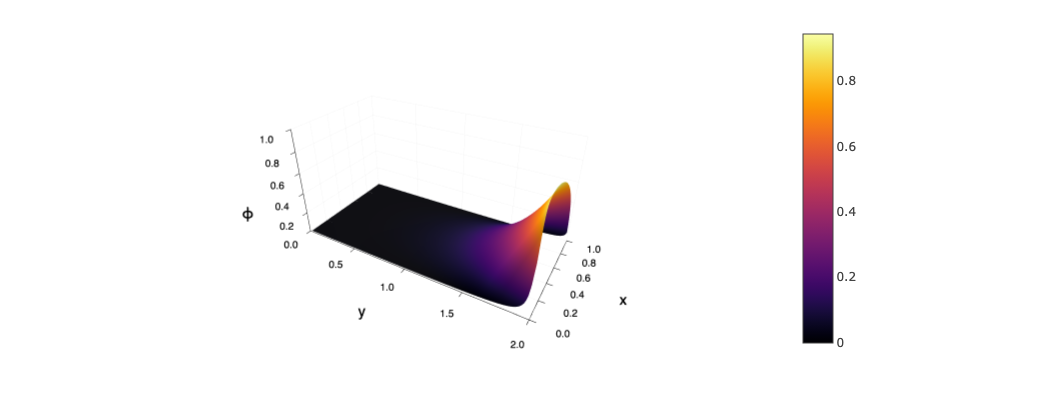

In [108]:
surface(y,x,ϕ,xlabel="y",ylabel="x",zlabel="ϕ")
ylims!(x₀,xᴶ)
xlims!(y₀,yᴸ)
zlims!(0,1)